In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [2]:
!pip install xgboost
# XGBOOST (uNDER RANDOM FOREST CLASSIFIER),IT IS AN OPEN SOURCE SOFTWARE LIBRARY
#WHICH provides a regularization gradient boosting frame work
#xGBOOST IS BOOSTING ALGORITHM THAT USES  BAGGING WHICH TRAINES DECISION TREE AND COMBINES THE RESULT


In [3]:
df=pd.read_csv('/content/Titanic_train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: ylabel='Count'>

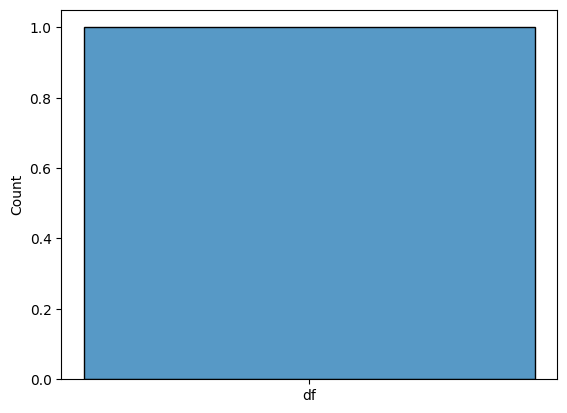

In [79]:
sns.histplot('df')

<Axes: >

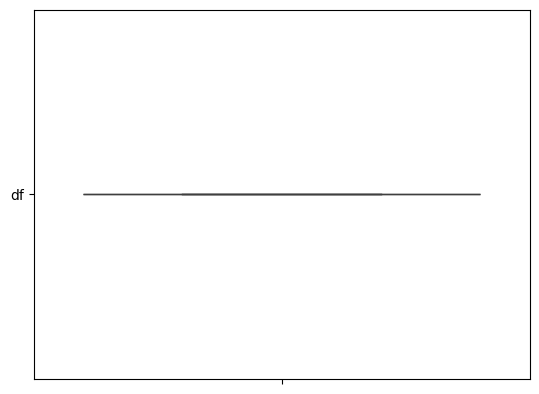

In [81]:
sns.boxplot('df')

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])

In [14]:
df['Embarked']

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [16]:
df.drop(['Embarked'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [21]:
df.shape

(891, 12)

In [29]:
X=df.drop(['Age','Name','Ticket','Cabin','Sex','Embarked'],axis=1)

In [26]:
y=df['Embarked']

In [30]:
X

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500
...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000
887,888,1,1,0,0,30.0000
888,889,0,3,1,2,23.4500
889,890,1,1,0,0,30.0000


In [33]:
X_train,y_train=X,y

In [35]:
test_df=pd.read_csv('/content/Titanic_test.csv')

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [37]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [38]:
X_test=test_df.drop(['Age','Name','Ticket','Cabin','Sex','Embarked'],axis=1)

In [39]:
X_test

,PassengerId,Pclass,SibSp,Parch,Fare
0,892,3,0,0,7.8292
1,893,3,1,0,7.0000
2,894,2,0,0,9.6875
3,895,3,0,0,8.6625
4,896,3,1,1,12.2875
...,...,...,...,...,...
413,1305,3,0,0,8.0500
414,1306,1,0,0,108.9000
415,1307,3,0,0,7.2500
416,1308,3,0,0,8.0500


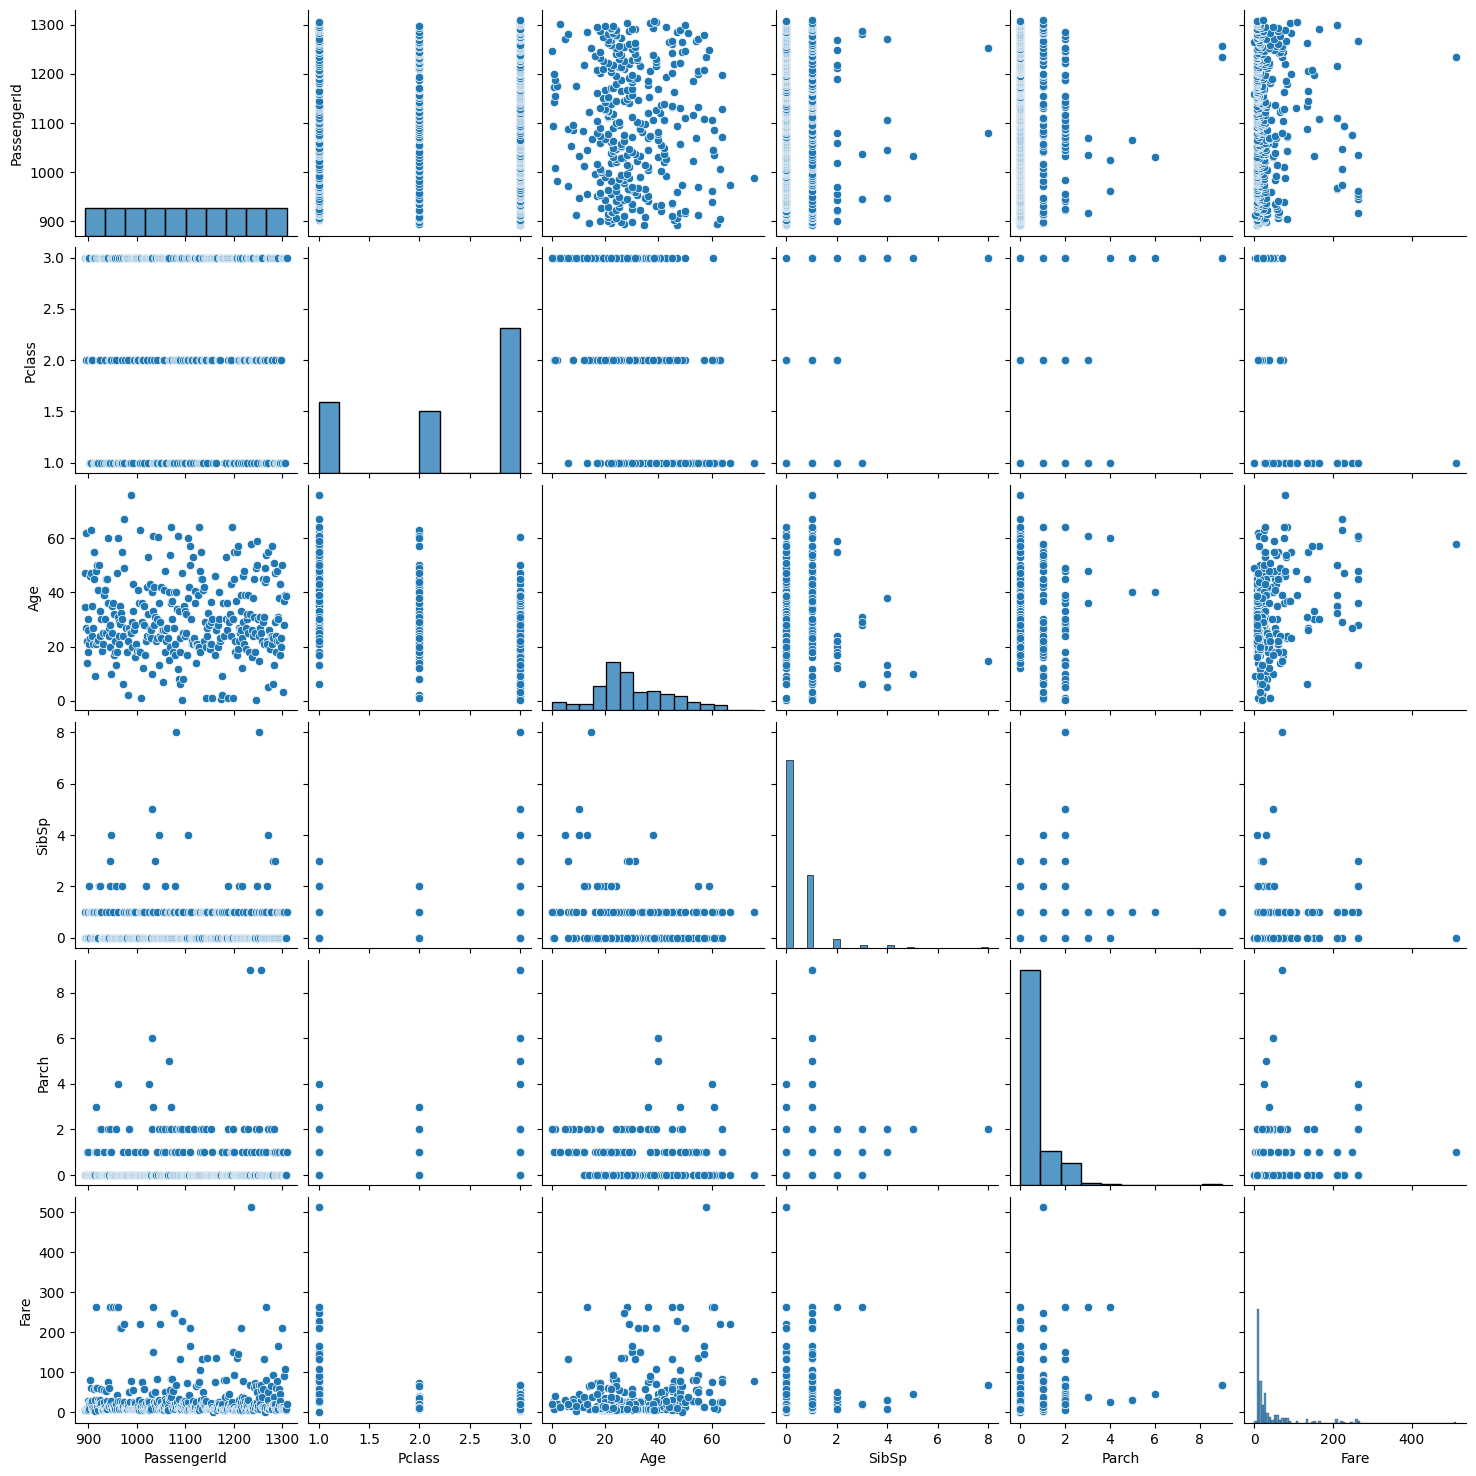

In [75]:
# prompt: plot the test_df

sns.pairplot(test_df)
plt.show()


In [40]:
y_test=test_df['Embarked']

In [41]:
y_test

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


<Axes: ylabel='Count'>

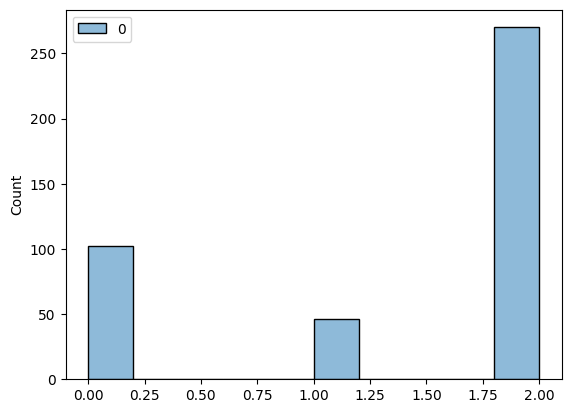

In [82]:
sns.histplot(y_test)

In [42]:
y_test=le.fit_transform(y_test)

In [43]:
y_test

array([1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2,

In [44]:
y_test=pd.DataFrame(y_test)

In [45]:
y_test

,0
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [89]:
lg=LogisticRegression()

In [83]:
#EDA1,EDA2
# Building model
from xgboost import XGBClassifier as xgb
model=xgb()

In [85]:
model=model.fit(X_train,y_train)

In [48]:
pred_train=model.predict(X_train)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_train,pred_train)

array([[167,   0,   1,   0],
       [  0,  77,   0,   0],
       [  0,   1, 643,   0],
       [  0,   0,   0,   2]])

In [52]:
model_test=model.fit(X_test,y_test)

In [53]:
pred_test=model.predict(X_test)

In [54]:
confusion_matrix(y_test,pred_test)

array([[102,   0,   0],
       [  0,  46,   0],
       [  0,   0, 270]])

In [55]:
from sklearn.metrics import accuracy_score,classification_report

In [56]:
accuracy_score(y_train,pred_train)

0.9977553310886644

In [57]:
accuracy_score(y_test,pred_test)

1.0

In [58]:
classification_report(y_train,pred_train)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       168\n           1       0.99      1.00      0.99        77\n           2       1.00      1.00      1.00       644\n           3       1.00      1.00      1.00         2\n\n    accuracy                           1.00       891\n   macro avg       1.00      1.00      1.00       891\nweighted avg       1.00      1.00      1.00       891\n'

In [59]:
classification_report(y_test,pred_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       102\n           1       1.00      1.00      1.00        46\n           2       1.00      1.00      1.00       270\n\n    accuracy                           1.00       418\n   macro avg       1.00      1.00      1.00       418\nweighted avg       1.00      1.00      1.00       418\n'

lgbm

In [60]:
!pip install lightgbm

In [62]:
import lightgbm as lgb

In [66]:

model=lgb.LGBMClassifier(learning_rate=0.09,max_depth=5,random_state=42)
model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 6
[LightGBM] [Info] Start training from score -1.668380
[LightGBM] [Info] Start training from score -2.448539
[LightGBM] [Info] Start training from score -0.324646
[LightGBM] [Info] Start training from score -6.099197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=42)

In [67]:
print('Training accuracy{:4f}'.format(model.score(X_train,y_train)))

Training accuracy0.948373


In [70]:
model.fit(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 418, number of used features: 5
[LightGBM] [Info] Start training from score -1.410509
[LightGBM] [Info] Start training from score -2.206840
[LightGBM] [Info] Start training from score -0.437059
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

LGBMClassifier(learning_rate=0.09, max_depth=5, random_state=42)

In [71]:
print('Testing accuracy{:4f}'.format(model.score(X_test,y_test)))


Testing accuracy0.937799


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

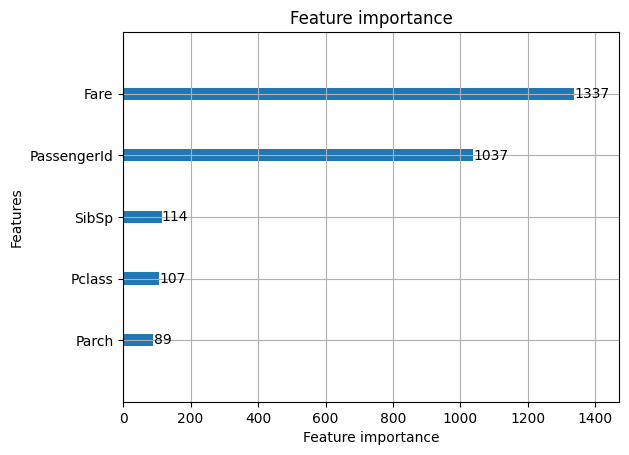

In [72]:
lgb.plot_importance(model)

Both models are good,almost gave high accuracy values moreover xgbm has more accuracy level

In [90]:
models=[]
models.append(('LogisticRegression',lg))
models.append(('XGBClassifier',model))
models.append(('LGBMClassifier',model))

In [92]:
def predictor(models,X_train,y_train):
  for name,model in models:
    model.fit(X_train,y_train)

In [93]:
print('Training accuracy{:4f}'.format(model.score(X_train,y_train)))

Training accuracy0.997755
